<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Data Science Para Análise Multivariada de Dados</font>
## <font color='blue'>Projeto 1</font>
## <font color='blue'>Processo Completo de Análise Exploratória de Dados Multivariados</font>

### Instalando e Carregando Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

https://pypi.org/project/missingno/

In [2]:
!pip install -q missingno

In [3]:
# Imports
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Carregando os Dados

In [5]:
# Carrega o dataset
df_dsa = pd.read_csv("dataset.csv")

In [6]:
# Shape
df_dsa.shape

(2237, 25)

In [7]:
# Amostra dos dados
df_dsa.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,"$24,163.00",1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,"$72,063.00",0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [8]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2237 non-null   int64 
 1    Ano_Nascimento            2237 non-null   int64 
 2    Educacao                  2237 non-null   object
 3    Estado_Civil              2237 non-null   object
 4    Renda                     2213 non-null   object
 5    Criancas_Em_Casa          2237 non-null   int64 
 6    Adolescentes_Em_Casa      2237 non-null   int64 
 7    Data_Cadastro_Cliente     2237 non-null   object
 8    Gasto_Vinhos              2237 non-null   int64 
 9    Gasto_Frutas              2237 non-null   int64 
 10   Gasto_Carnes              2237 non-null   int64 
 11   Gasto_Peixes              2237 non-null   int64 
 12   Gasto_Doces               2237 non-null   int64 
 13   Gasto_Outros              2237 non-null   int64 
 14   Num_Com

## Limpeza e Processamento Inicial dos Dados

In [9]:
# Vamos remover o espaço extra nos títulos das colunas
df_dsa.columns = df_dsa.columns.str.replace(' ', '') 

In [10]:
# A variável Renda tem o caracter $. Vamos remover esse caracter especial para ter a coluna como numérica
df_dsa['Renda'] = df_dsa['Renda'].str.replace('$', '').str.replace(',', '').astype(float) 

In [11]:
# A coluna de data está como tipo object. Vamos converter para o tipo datetime
df_dsa['Data_Cadastro_Cliente'] = pd.to_datetime(df_dsa['Data_Cadastro_Cliente']) 

In [12]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2237 non-null   int64         
 1   Ano_Nascimento            2237 non-null   int64         
 2   Educacao                  2237 non-null   object        
 3   Estado_Civil              2237 non-null   object        
 4   Renda                     2213 non-null   float64       
 5   Criancas_Em_Casa          2237 non-null   int64         
 6   Adolescentes_Em_Casa      2237 non-null   int64         
 7   Data_Cadastro_Cliente     2237 non-null   datetime64[ns]
 8   Gasto_Vinhos              2237 non-null   int64         
 9   Gasto_Frutas              2237 non-null   int64         
 10  Gasto_Carnes              2237 non-null   int64         
 11  Gasto_Peixes              2237 non-null   int64         
 12  Gasto_Doces         

In [13]:
# Amostra dos dados
df_dsa.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


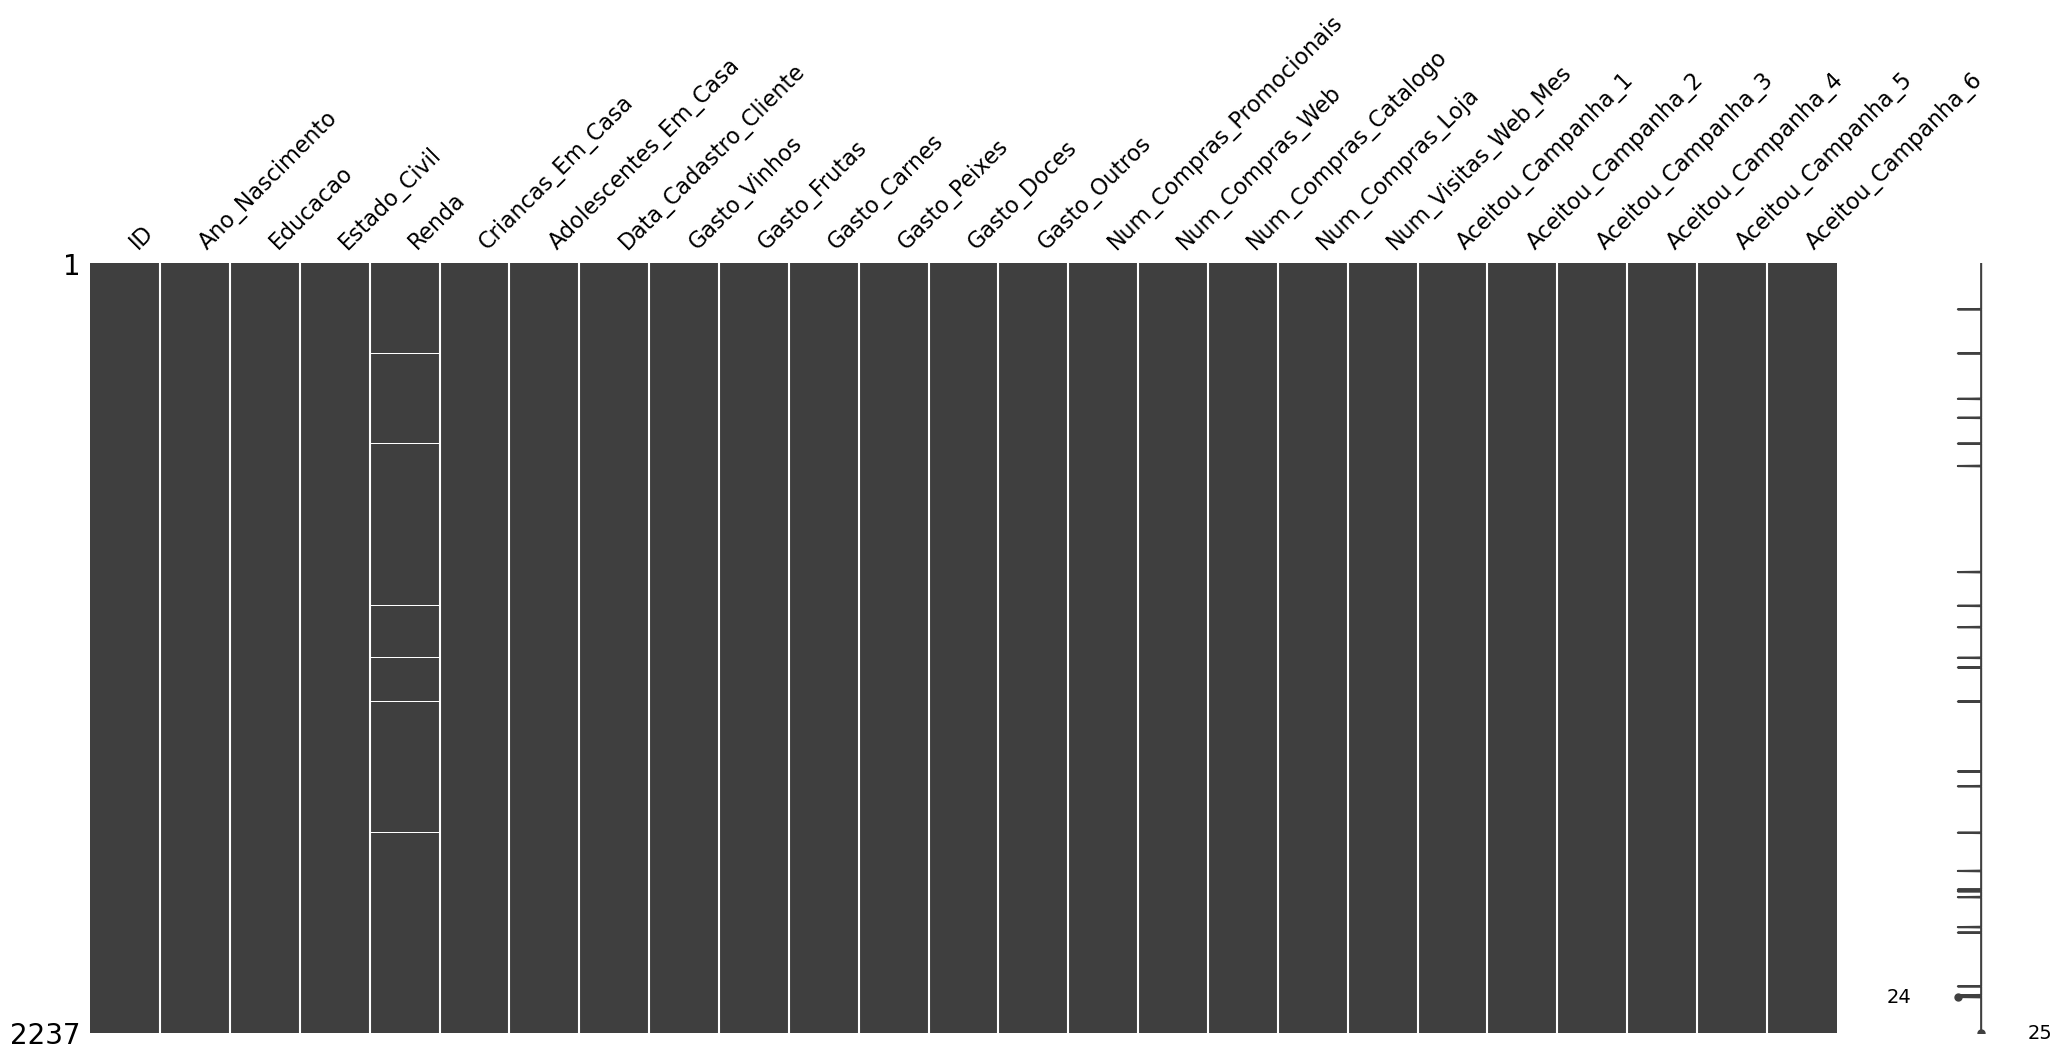

In [14]:
# Matriz de valores ausentes
msno.matrix(df_dsa)
plt.show()

In [15]:
# Soma de valores ausentes
valores_ausentes = df_dsa.isnull().sum().sort_values(ascending = False)

In [16]:
valores_ausentes

Renda                       24
ID                           0
Gasto_Outros                 0
Aceitou_Campanha_5           0
Aceitou_Campanha_4           0
Aceitou_Campanha_3           0
Aceitou_Campanha_2           0
Aceitou_Campanha_1           0
Num_Visitas_Web_Mes          0
Num_Compras_Loja             0
Num_Compras_Catalogo         0
Num_Compras_Web              0
Num_Compras_Promocionais     0
Gasto_Doces                  0
Ano_Nascimento               0
Gasto_Peixes                 0
Gasto_Carnes                 0
Gasto_Frutas                 0
Gasto_Vinhos                 0
Data_Cadastro_Cliente        0
Adolescentes_Em_Casa         0
Criancas_Em_Casa             0
Estado_Civil                 0
Educacao                     0
Aceitou_Campanha_6           0
dtype: int64

In [17]:
# Filtramos pelas que são diferentes de zero
print(valores_ausentes.loc[valores_ausentes != 0])

Renda    24
dtype: int64


Para tratar os valores ausentes primeiro devemos checar se há outliers na variável, o que ajudará a tomar a decisão ideal de tratamento dos valores ausentes.

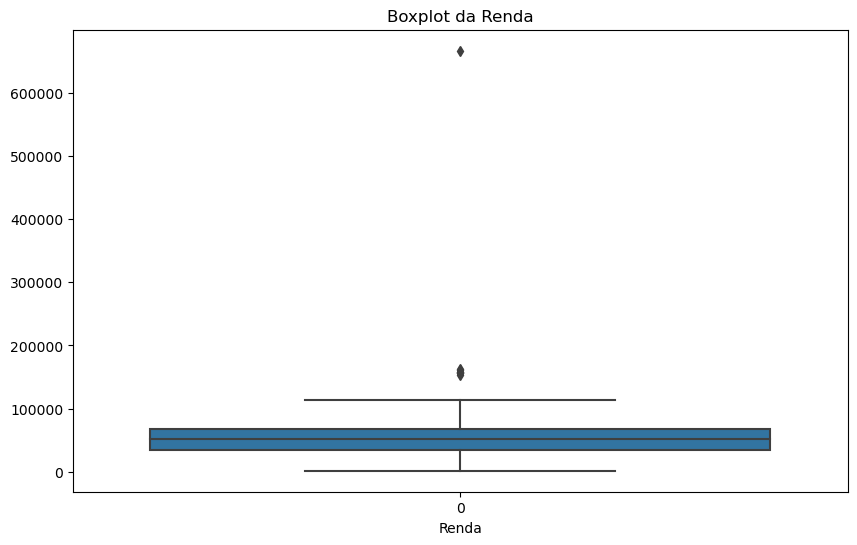

In [18]:
# Vamos usar um boxplot para visualizar se há outliers na coluna 'Renda'
plt.figure(figsize = (10, 6))
sns.boxplot(df_dsa['Renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

Sim, parece haver outliers. Vamos nos certificar usando a regra estatística.

In [19]:
# Calculando o IQR para a coluna 'Renda'
Q1 = df_dsa['Renda'].quantile(0.25)
Q3 = df_dsa['Renda'].quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Definindo os limites para considerar um ponto como outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
# Identificando os outliers
outliers = df_dsa[(df_dsa['Renda'] < lower_bound) | (df_dsa['Renda'] > upper_bound)]
outliers

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
325,4931,1977,Graduação,Casado,157146.0,0,0,2013-04-29,1,0,...,0,28,0,1,0,0,0,0,0,0
497,1501,1982,PhD,Casado,160803.0,0,0,2008-04-12,55,16,...,0,28,1,0,0,0,0,0,0,0
526,9432,1977,Graduação,Casado,666666.0,1,0,2006-02-13,9,14,...,3,1,3,6,0,0,0,0,0,0
730,1503,1976,PhD,Casado,162397.0,1,1,2006-03-13,85,1,...,0,0,1,1,0,0,0,0,0,0
851,5336,1971,Mestrado,Casado,157733.0,1,0,2006-04-13,39,1,...,1,0,1,1,0,0,0,0,0,0
1787,5555,1975,Graduação,Divorciado,153924.0,0,0,2002-07-14,1,1,...,0,0,0,0,0,0,0,0,0,0
1886,11181,1949,PhD,Casado,156924.0,0,0,2013-08-29,2,1,...,0,0,0,0,0,0,0,0,0,0
2165,8475,1973,PhD,Casado,157243.0,0,1,2003-01-14,20,2,...,0,22,0,0,0,0,0,0,0,0


Vamos checar a distribuição da variável.

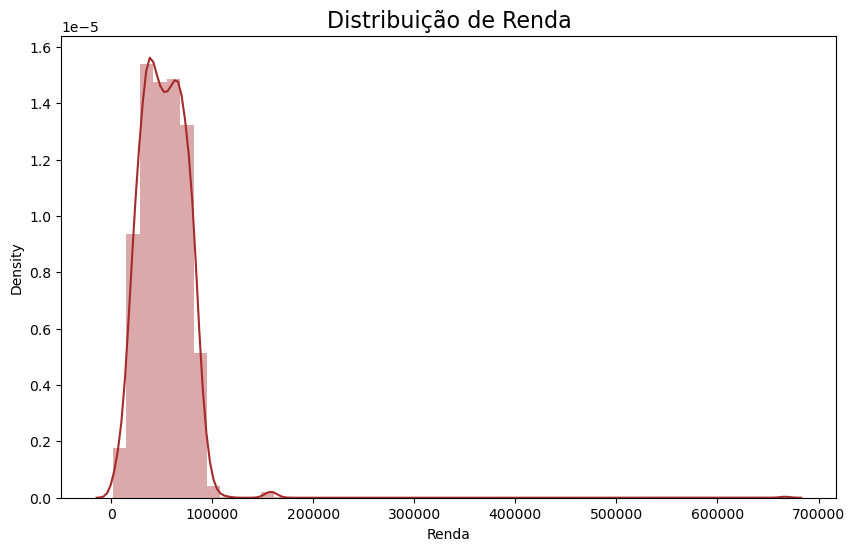

In [22]:
# Definindo o tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df_dsa['Renda'], color = 'brown')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

Existem várias estratégias para tratar outliers em um conjunto de dados e a escolha da melhor abordagem depende do contexto específico e do objetivo da análise. Aqui estão algumas opções comuns:

**Remoção**: Simplesmente remover os outliers do conjunto de dados. Esta é uma abordagem direta, mas pode não ser ideal se o número de outliers for significativo ou se esses pontos contiverem informações importantes.

**Substituição**: Substituir os valores dos outliers por outros mais representativos, como a média ou mediana dos dados. Esta abordagem é útil se os outliers forem considerados erros de medição ou entrada de dados.

**Transformação**: Aplicar uma transformação aos dados pode reduzir o impacto dos outliers. Transformações comuns incluem logarítmica, raiz quadrada ou Box-Cox.

**Capping (Limitação)**: Definir um limite superior e/ou inferior para os valores dos dados. Valores além desses limites são trazidos para o limite mais próximo. Por exemplo, todos os valores acima do limite superior são definidos para esse limite.

**Análise Separada**: Às vezes, os outliers são mantidos no conjunto de dados e analisados separadamente para entender melhor suas características.

**Análise de Causa**: Investigar a causa dos outliers. Se eles são resultado de um fenômeno real, pode ser importante incluí-los na análise.

A escolha do método depende da natureza dos dados e do objetivo da análise. Em muitos casos, uma combinação dessas estratégias pode ser a mais eficaz. 

Vamos apenas remover os outliers pois são poucos registros.

In [23]:
# Filtrando o dataframe e removendo os outliers
df_dsa = df_dsa[(df_dsa['Renda'] >= lower_bound) & (df_dsa['Renda'] <= upper_bound)]

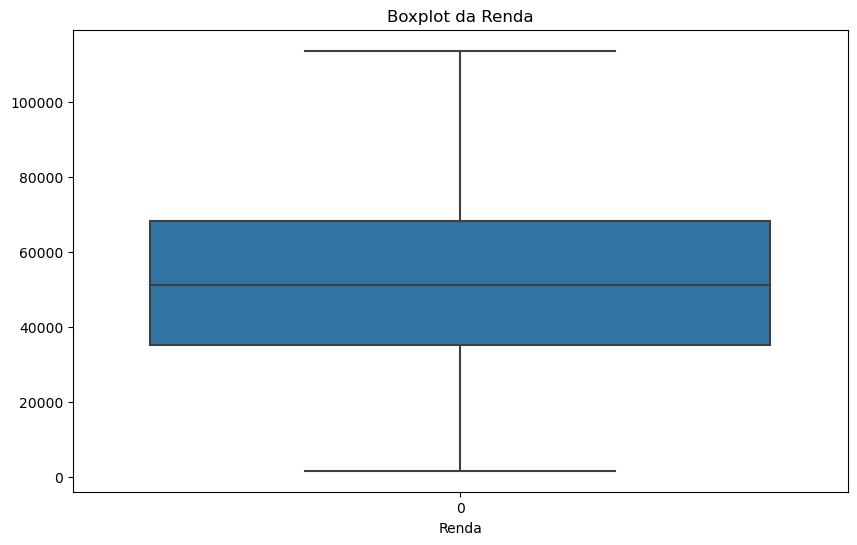

In [24]:
# Vamos usar um boxplot para visualizar se há outliers na coluna 'Renda'
plt.figure(figsize = (10, 6))
sns.boxplot(df_dsa['Renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

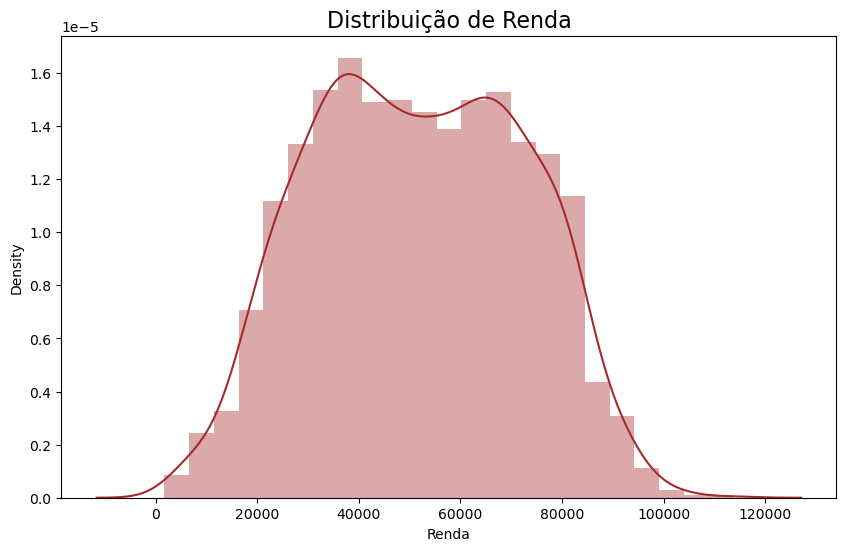

In [25]:
# Definindo o tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df_dsa['Renda'], color = 'brown')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

Agora tratamos os valores ausentes.

In [26]:
# Normaliza os dados antes de aplicar o KNNImputer (opcional, mas recomendado)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_dsa[['Renda']])

In [27]:
# Cria o KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [28]:
# Imputa os valores ausentes com o imputer
data_imputed = imputer.fit_transform(data_scaled)

In [29]:
# Converter de volta para o formato original 
df_dsa['Renda'] = scaler.inverse_transform(data_imputed)

In [30]:
print('Total de Valores Ausentes:', df_dsa.isnull().sum().sum())

Total de Valores Ausentes: 0


In [31]:
df_dsa.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


## Análise Exploratória e Engenharia de Atributos

In [32]:
# Colunas
df_dsa.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6'],
      dtype='object')

In [33]:
# Drop (em memória) das colunas categóricas para criar o box plot das colunas quantitativas
data_boxplot = df_dsa.drop(columns = ['ID',
                                      'Educacao',
                                      'Estado_Civil',
                                      'Criancas_Em_Casa',
                                      'Data_Cadastro_Cliente',
                                      'Adolescentes_Em_Casa', 
                                      'Aceitou_Campanha_1', 
                                      'Aceitou_Campanha_2',
                                      'Aceitou_Campanha_3', 
                                      'Aceitou_Campanha_4', 
                                      'Aceitou_Campanha_5',
                                      'Aceitou_Campanha_6'])

In [34]:
data_boxplot.columns

Index(['Ano_Nascimento', 'Renda', 'Gasto_Vinhos', 'Gasto_Frutas',
       'Gasto_Carnes', 'Gasto_Peixes', 'Gasto_Doces', 'Gasto_Outros',
       'Num_Compras_Promocionais', 'Num_Compras_Web', 'Num_Compras_Catalogo',
       'Num_Compras_Loja', 'Num_Visitas_Web_Mes'],
      dtype='object')

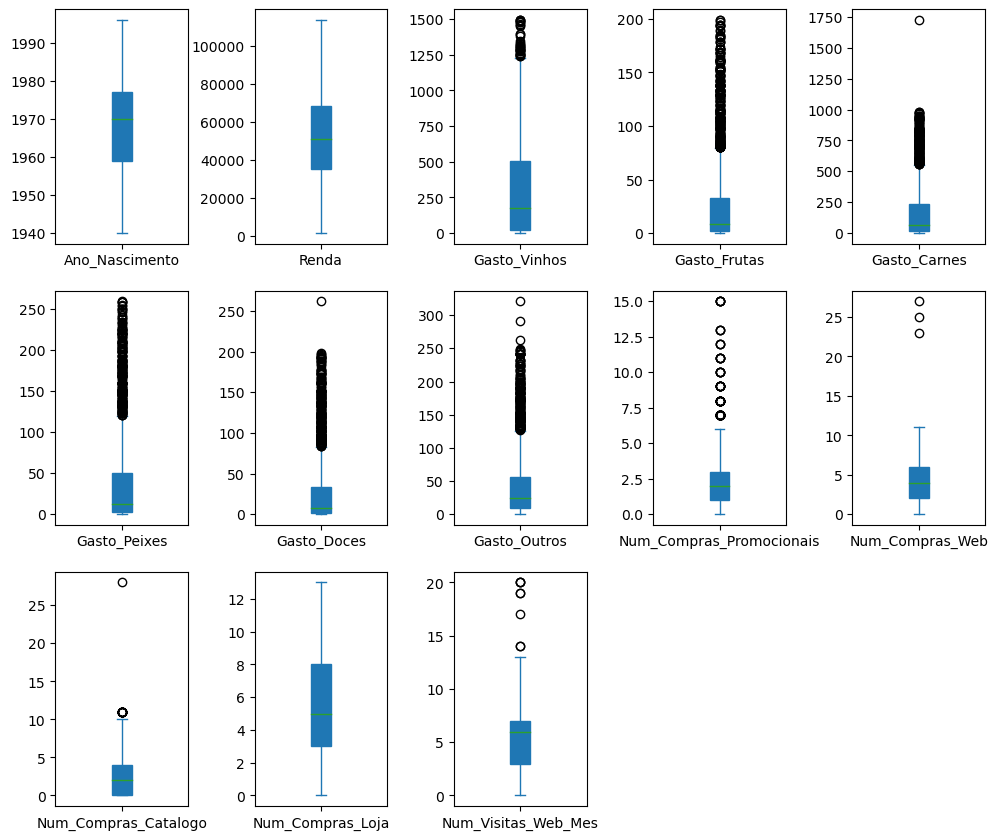

In [35]:
# Plot
data_boxplot.plot(subplots = True, layout = (4,5), kind = 'box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace=0.5);

> Vamos transformar algumas variáveis, criar novas e combinar outras em um trabalho de engenharia de atributos que vai nos ajudar na exploração dos dados.

In [36]:
# Vamos criar uma nova coluna com a idade de cada cliente (ano atual - ano de nascimento)
ano_atual = datetime.now().year
df_dsa['Idade'] = ano_atual - df_dsa['Ano_Nascimento']

In [37]:
df_dsa.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,6,2,0,0,0,0,0,0,47
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,12,3,0,0,0,0,0,0,64
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,3,4,0,0,0,0,0,0,54
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,6,4,2,0,0,0,0,0,0,55
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,2,12,2,0,0,0,0,0,0,45


In [38]:
# Criaremos uma coluna com o número de dias como cliente desde a data de cadastro
df_dsa['Dias_Como_Cliente'] = df_dsa['Data_Cadastro_Cliente'].max() - df_dsa['Data_Cadastro_Cliente']

In [39]:
df_dsa.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,6,2,0,0,0,0,0,0,47,255 days
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,12,3,0,0,0,0,0,0,64,259 days
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,3,4,0,0,0,0,0,0,54,1294 days
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,2,0,0,0,0,0,0,55,272 days
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,12,2,0,0,0,0,0,0,45,2665 days


In [40]:
# Removeremos a palavra "days" ao final do valor de cada linha da coluna Dias_Como_Cliente
df_dsa['Dias_Como_Cliente'] = df_dsa['Dias_Como_Cliente'].astype(str).str.replace(' days', '')

In [41]:
df_dsa.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,6,2,0,0,0,0,0,0,47,255
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,12,3,0,0,0,0,0,0,64,259
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,3,4,0,0,0,0,0,0,54,1294
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,2,0,0,0,0,0,0,55,272
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,12,2,0,0,0,0,0,0,45,2665


In [42]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

In [43]:
# Ajusta o tipo de dado da variável Dias_Como_Cliente
df_dsa['Dias_Como_Cliente'] = pd.to_numeric(df_dsa['Dias_Como_Cliente'], downcast = 'integer')

In [44]:
df_dsa.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente'],
      dtype='object')

In [45]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

In [46]:
# Cria uma variável com o Total de Compras realizadas nos 3 diferentes canais
df_dsa['TotalCompras'] = df_dsa['Num_Compras_Web'] + df_dsa['Num_Compras_Catalogo'] + df_dsa['Num_Compras_Loja']

In [47]:
df_dsa.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,2,0,0,0,0,0,0,47,255,8
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,3,0,0,0,0,0,0,64,259,26
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,4,0,0,0,0,0,0,54,1294,4
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,2,0,0,0,0,0,0,55,272,14
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,2,0,0,0,0,0,0,45,2665,19


In [48]:
df_dsa.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'TotalCompras'],
      dtype='object')

In [49]:
# Cria a variável Gasto_Total com o somatório de todas as colunas que começam com o nome Gasto
df_dsa['Gasto_Total'] = df_dsa.filter(like = 'Gasto').sum(axis=1)

In [50]:
df_dsa.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,0,0,47,255,8,162
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,0,0,64,259,26,1123
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,0,0,54,1294,4,17
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,0,0,55,272,14,1044
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,0,0,45,2665,19,758


In [51]:
df_dsa.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'TotalCompras',
       'Gasto_Total'],
      dtype='object')

In [52]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

In [53]:
df_dsa['Aceitou_Campanha_1'].value_counts()

Aceitou_Campanha_1
0    2042
1     163
Name: count, dtype: int64

In [54]:
df_dsa['Aceitou_Campanha_2'].value_counts()

Aceitou_Campanha_2
0    2041
1     164
Name: count, dtype: int64

In [55]:
# Criaremos a variável para indicar se o cliente aceitou qualquer campanha (e comprou o produto ofertado)
df_dsa['aceite_campanha'] = df_dsa.filter(like = 'Aceitou').sum(axis = 1)

In [56]:
df_dsa.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,0,47,255,8,162,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,0,64,259,26,1123,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,0,54,1294,4,17,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,0,55,272,14,1044,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,0,45,2665,19,758,0


In [57]:
df_dsa.sample(10)

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha
238,9597,1969,Graduação,Casado,73448.0,0,0,2002-10-14,236,106,...,0,0,0,0,0,55,4276,18,725,0
412,8962,1975,Mestrado,Casado,44319.0,1,1,2014-04-17,26,0,...,0,0,0,0,0,49,73,5,37,0
1762,9907,1969,Mestrado,Casado,66476.0,0,1,2012-04-13,742,28,...,0,0,0,0,0,55,807,24,1013,0
33,6310,1978,Graduação,Casado,33039.0,1,0,2009-09-13,30,8,...,0,0,0,0,0,46,1750,6,78,0
2038,123,1951,Graduação,Viúvo,67046.0,0,1,2001-06-13,544,35,...,0,0,0,0,0,73,4764,13,993,0
1088,1176,1973,Graduação,Casado,26228.0,1,0,2013-09-22,2,6,...,0,0,0,0,0,51,280,3,25,0
122,4098,1973,Graduação,Casado,24639.0,1,1,2014-01-28,20,3,...,0,0,0,0,0,51,152,6,44,0
2156,5153,1967,PhD,Casado,77766.0,0,1,2013-02-22,1004,59,...,0,0,0,0,1,57,492,32,1529,2
753,3517,1952,Graduação,Solteiro,40887.0,1,1,2005-06-13,50,4,...,0,0,0,0,1,72,3303,7,161,1
156,67,1972,Mestrado,Solteiro,46423.0,1,1,2013-09-18,68,0,...,0,0,0,0,0,52,284,6,92,0


In [58]:
# Vamos ajustar o tipo de dado e colocar em uma nova coluna
df_dsa['RespostaCampanha'] = df_dsa['aceite_campanha'].apply(lambda x: 'Aceitou' if x > 0 else 'Não Aceitou')

In [59]:
df_dsa.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha,RespostaCampanha
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,47,255,8,162,0,Não Aceitou
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,64,259,26,1123,0,Não Aceitou
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,54,1294,4,17,0,Não Aceitou
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,55,272,14,1044,0,Não Aceitou
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,45,2665,19,758,0,Não Aceitou


In [60]:
df_dsa.sample(10)

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha,RespostaCampanha
1669,2948,1954,Mestrado,Divorciado,62637.0,0,1,2003-01-14,104,12,...,0,0,0,0,70,4184,9,185,0,Não Aceitou
2110,5863,1953,Graduação,Casado,47703.0,0,1,2013-05-29,359,0,...,0,0,0,0,71,396,17,655,0,Não Aceitou
1505,10513,1992,Graduação,Casado,63207.0,0,0,2013-01-20,438,169,...,0,1,0,0,32,525,11,1502,1,Aceitou
1697,295,1989,Graduação,Solteiro,81217.0,0,0,2013-07-19,493,70,...,0,0,0,0,35,345,21,1157,0,Não Aceitou
1231,2963,1979,Graduação,Casado,75507.0,0,0,2005-02-14,709,93,...,0,0,0,0,45,3422,20,1440,0,Não Aceitou
1838,4370,1966,Graduação,Casado,43482.0,2,1,2013-11-13,18,1,...,0,0,0,0,58,228,6,88,0,Não Aceitou
716,3220,1983,Graduação,Casado,39922.0,1,0,2013-02-14,29,12,...,0,0,0,0,41,500,7,156,0,Não Aceitou
674,9316,1952,Ensino Fundamental,Casado,13084.0,0,0,2011-02-13,2,0,...,0,0,0,0,72,1232,4,29,0,Não Aceitou
2024,6237,1966,PhD,Solteiro,7144.0,0,2,2012-07-13,81,4,...,0,0,0,0,58,716,25,416,0,Não Aceitou
227,466,1944,Graduação,Casado,65275.0,0,0,2004-03-13,388,14,...,0,0,0,0,80,3760,20,746,0,Não Aceitou


In [61]:
# Vamos observar uma amostra aleatória das variáveis que criamos
df_dsa[['Idade', 'Dias_Como_Cliente', 'TotalCompras', 'Gasto_Total', 'RespostaCampanha']].sample(10)

,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,RespostaCampanha
240,63,220,18,1449,Aceitou
2099,67,194,22,835,Não Aceitou
749,41,374,14,410,Não Aceitou
1081,61,2147,8,152,Não Aceitou
4,45,2665,19,758,Não Aceitou
1365,36,337,28,2524,Aceitou
1983,54,37,5,45,Não Aceitou
118,54,76,20,714,Não Aceitou
911,76,1842,6,100,Não Aceitou
1786,55,133,4,42,Não Aceitou


In [62]:
# Não precisamos mais destas variáveis
df_dsa.drop(['Ano_Nascimento', 'Data_Cadastro_Cliente', 'aceite_campanha'], axis = 1, inplace = True)

In [63]:
df_dsa.head()

,ID,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,RespostaCampanha
0,9970,Graduação,Casado,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,47,255,8,162,Não Aceitou
1,4002,PhD,Casado,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,64,259,26,1123,Não Aceitou
2,10914,Graduação,Solteiro,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,54,1294,4,17,Não Aceitou
3,7279,PhD,Casado,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,55,272,14,1044,Não Aceitou
4,10582,Graduação,Casado,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,45,2665,19,758,Não Aceitou


In [64]:
df_dsa.describe()

,ID,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,...,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5585.439456,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.073923,0.074376,0.073016,0.064399,0.013605,0.15102,55.095692,1307.092971,12.569615,606.821769
std,3247.546423,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.261705,0.262442,0.260222,0.245518,0.115872,0.35815,11.705801,1429.824606,7.180350,601.675284
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,28.000000,0.000000,0.000000,5.000000
25%,2815.000000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,47.000000,286.000000,6.000000,69.000000
50%,5455.000000,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,54.000000,583.000000,12.000000,397.000000
75%,8418.000000,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,65.000000,2116.000000,18.000000,1047.000000
max,11191.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,84.000000,4915.000000,32.000000,2525.000000


# Continuaremos no Próximo Capítulo.

In [65]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [66]:
#%watermark -v -m

In [67]:
#%watermark --iversions

# Fim